In [70]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

In [71]:
# data preparing and loading
# using a linear regression formula with known parameters

# create known parameters
weight = 0.7
bias = 0.3

# create some data
start  = 0
end = 1

step = 0.02

X = torch.arange(start,end, step).unsqueeze(dim=1)

y = weight *X +bias


In [72]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [73]:
# create train and test split

train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

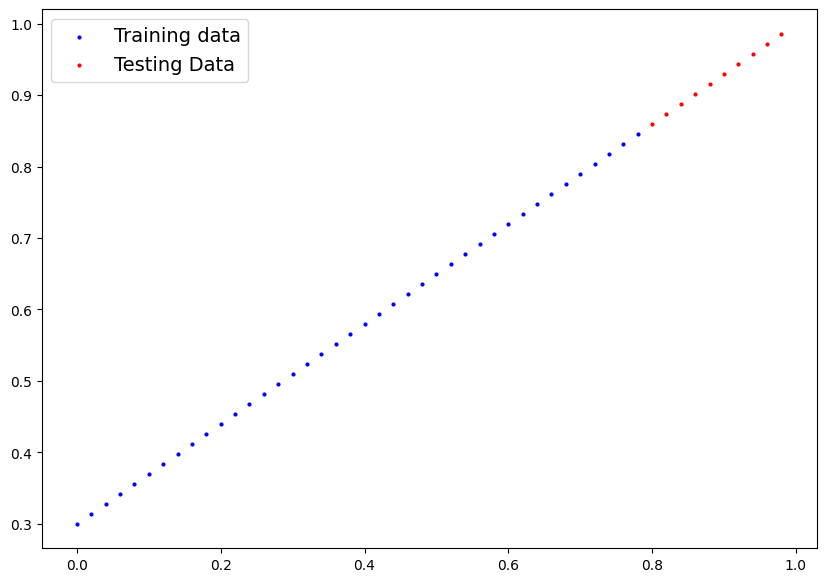

In [74]:
# visualization of the data
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     ):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c= 'b', s =4, label='Training data' )

  # plotting the test data
  plt.scatter(test_data, test_labels, c='r',s=4,label='Testing Data' )

  if predictions is not None:
    plt.scatter(test_data, predictions, c='y', s=4, label='Predictions')
  plt.legend(prop={'size':14})

plot_predictions()





In [75]:
# building first pytorch model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    # building the standard foward method for the NN

  def forward(self, X:torch.Tensor)-> torch.Tensor:
    """

    Args:
      X:features

    Returns:

    """
    return self.weights * X + self.bias

In [76]:
# checking the content of the pytorch model

torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

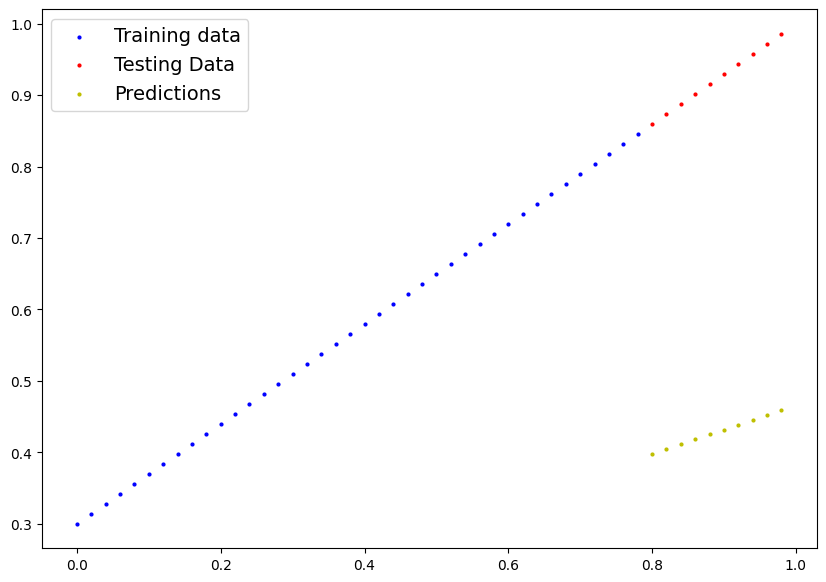

In [77]:
# checking models's predictiing power using torch.inference_mode()

with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)


In [78]:
# training the model
# using the MAE error called L1Loss in pytorch

loss_fn = nn.L1Loss()

# setting up the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.01)


In [79]:
# building my first understandable training loop
epochs = 201
epoch_count = []
loss_values = []
test_loss_values =[]

for epoch in range(epochs):
  # set the model to taining mode
  model_0.train() #ensuring that all parameters that need gradient be set to differentiable
  y_pred = model_0(X_train)

  # calculate the loss
  loss = loss_fn(y_pred,y_train)
  # print(loss)

  optimizer.zero_grad()

  # perform back propagration wrt the loss valus

  loss.backward()

  optimizer.step()

  model_0.eval() #turns the taining mode off
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | TestLoss:{test_loss} ')
    print(model_0.state_dict())




Epoch: 0 | Loss: 0.31288138031959534 | TestLoss:0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | TestLoss:0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | TestLoss:0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | TestLoss:0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | TestLoss:0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | TestLoss:0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | TestLoss:0.08886633068323135 
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

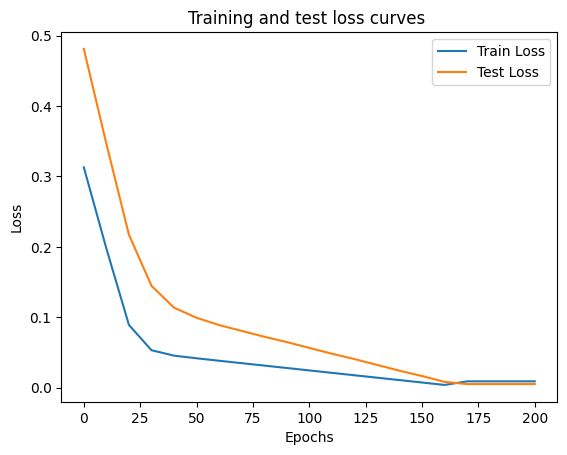

In [80]:
# plotting the loss_curves

plt.plot(epoch_count, loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title("Training and test loss curves ")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

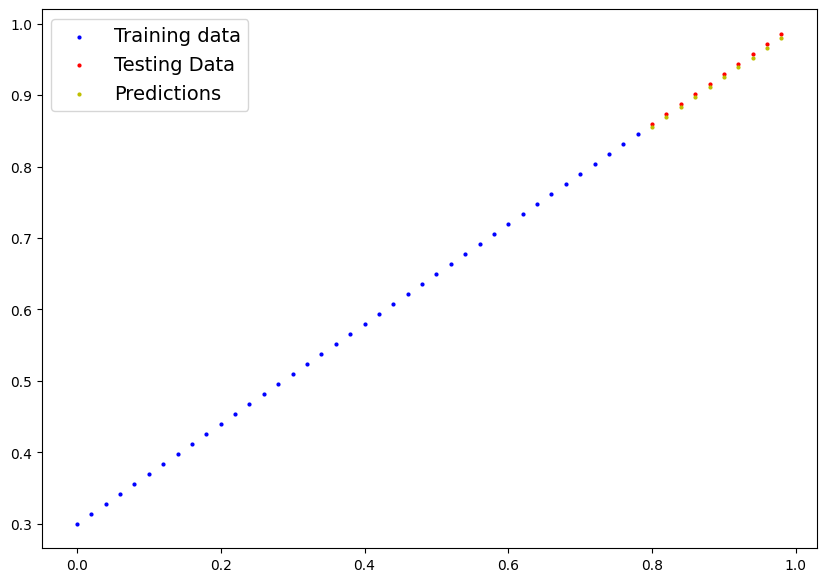

In [81]:
with torch.inference_mode():
  y_new_pred = model_0(X_test)

plot_predictions(predictions = y_new_pred)

In [82]:
# saving a model in pytorch
# there are three main methods of saving and loading
from pathlib import Path

# create model directorey

MODEL_PATH  = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="01_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# saving the state_dict

print(f'Saving the model to: {MODEL_SAVE_PATH}')

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


Saving the model to: models/01_pytorch_workflow_model_0.pth


In [83]:
# loading a pytorch model
# to load in a saved state dict, we'd have to instantiate a new instance of the Model class

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [84]:
# making some predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [85]:
import torch
from  torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.2.1+cu121'

In [86]:
# creating device gnostic code

device = "cuda" if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [114]:
# creating some data
weight = 0.7
bias = 0.3

start = 0
end = 1
step=0.02

# creating x and y features

X= torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X +bias

In [115]:
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

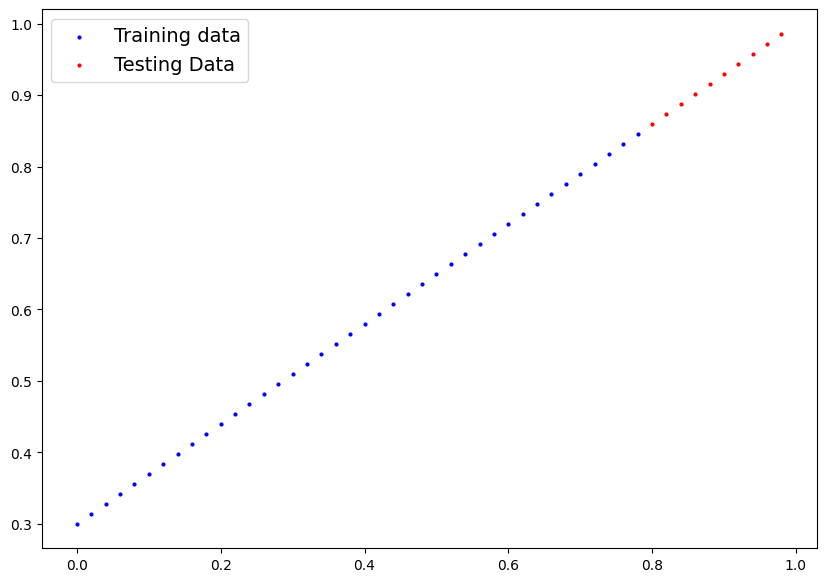

In [116]:
plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     )

In [138]:
class LinearRegressionModelP(nn.Module):
  def __init__(self):
    super().__init__()
    # self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    # self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    self.linear_layer = nn.Linear(in_features=1,out_features=1)
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)


In [141]:
# creating the optimizer

torch.manual_seed(42)
loss_fn = nn.L1Loss()
model_1 = LinearRegressionModelP()
model_1, model_1.state_dict()

(LinearRegressionModelP(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [142]:
# creating the optimiser forthe mode
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01)

In [135]:
# building the training loop
epochs = 201
epoch_values = []
train_loss_values =[]
test_loss_values = []


# building my first understandable training loo


for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  model_1.eval()
  # performing the operation to evaluate the model's performance
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_values.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f'Epoch:{epoch}| Train_Loss: {loss}| Test_loss:{test_loss}')

Epoch:0| Train_Loss: 0.31288138031959534| Test_loss:0.48106518387794495
Epoch:10| Train_Loss: 0.1976713240146637| Test_loss:0.3463551998138428
Epoch:20| Train_Loss: 0.08908725529909134| Test_loss:0.21729660034179688
Epoch:30| Train_Loss: 0.053148526698350906| Test_loss:0.14464017748832703
Epoch:40| Train_Loss: 0.04543796554207802| Test_loss:0.11360953003168106
Epoch:50| Train_Loss: 0.04167863354086876| Test_loss:0.09919948130846024
Epoch:60| Train_Loss: 0.03818932920694351| Test_loss:0.08886633068323135
Epoch:70| Train_Loss: 0.03476089984178543| Test_loss:0.0805937647819519
Epoch:80| Train_Loss: 0.03132382780313492| Test_loss:0.07232122868299484
Epoch:90| Train_Loss: 0.02788739837706089| Test_loss:0.06473556160926819
Epoch:100| Train_Loss: 0.024458957836031914| Test_loss:0.05646304413676262
Epoch:110| Train_Loss: 0.021020207554101944| Test_loss:0.04819049686193466
Epoch:120| Train_Loss: 0.01758546568453312| Test_loss:0.04060482233762741
Epoch:130| Train_Loss: 0.014155393466353416| Test

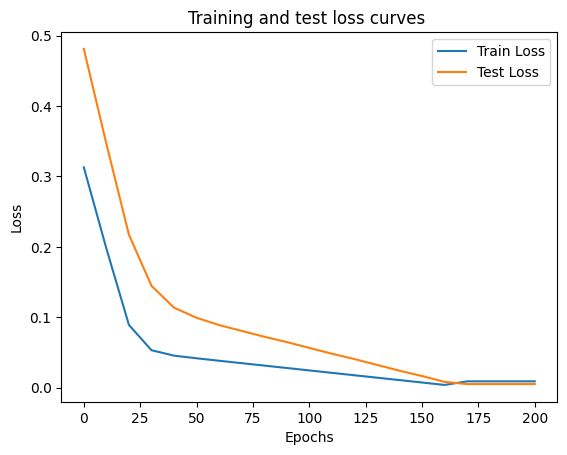

In [136]:
# print()
plt.plot(epoch_values, train_loss_values, label="Train Loss")
plt.plot(epoch_values, test_loss_values, label='Test Loss')
plt.title("Training and test loss curves ")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

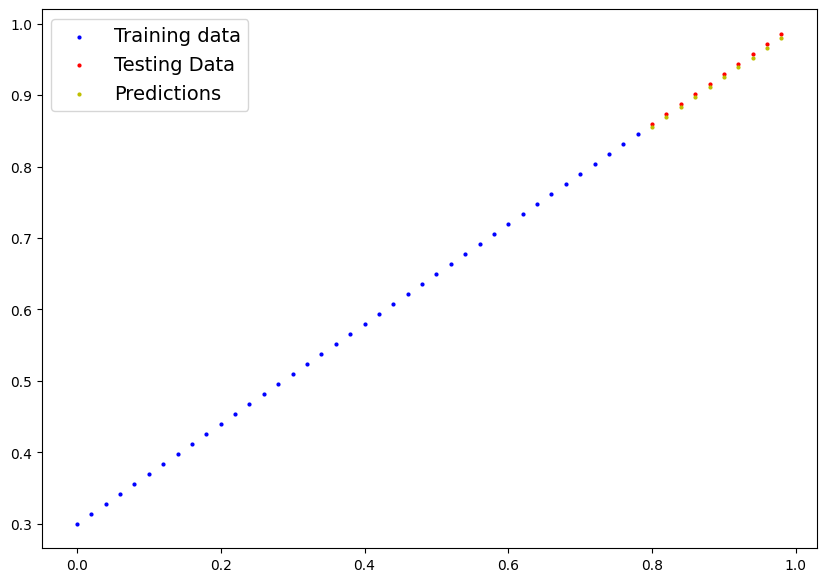

In [137]:
with torch.inference_mode():
  predictions = model_1(X_test)

plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = predictions
                     )

In [143]:
# Performing the mdeol training
from pathlib import Path

# create model directorey

MODEL_PATH  = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="01_pytorch_workflow_model_1.pth"

MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# saving the state_dict

print(f'Saving the model to: {MODEL_SAVE_PATH}')

torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)


Saving the model to: models/01_pytorch_workflow_model_1.pth


In [144]:
loaded_new_model = LinearRegressionModelP()
loaded_new_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

with torch.inference_mode():
  tem_preds  = loaded_new_model(X_test)

print(tem_preds)

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])
